<hr style='height:4px; background-color:black; border:none; margin-top:20px; margin-bottom:20px;'>

# **Week 3 & 4 Coding Assignment**

## **Course:** DSC530  
## **Student:** Tim Hollis  
## **Date:** 01/13/2026 

<hr style='height:2px; background-color:#444; border:none; margin-top:20px; margin-bottom:20px;'>

### Assignment Instructions

**Exercise 4**

Run the code in the first cell of the exercises.ipynb notebook. It will give you a list of 100 values to work with for the rest of the exercises in this chapter. Be sure to treat these values as a sample of the population.

**Exercise 5**

Using the data from Exercise 4, calculate the following statistics without importing anything from the statistics module (Python Statistics) in the Python standard library, and then confirm your results match up to those that are obtained when using the statistics module (where possible):

Mean
Median
Mode
Sample variance
Sample standard deviation

**Exercise 6**

Using the data from Exercise 4, calculate the following statistics using the functions in the statistics module where appropriate:

Range
Coefficient of variation
Interquartile range
Quartile coefficient of dispersion

**Exercise 7**

Scale the data created in Exercise 4 using the following strategies:

Min-max scaling (normalizing)
Standardizing

**Exercise 8**

Using the scaled data from Exercise 7, calculate the following:

The covariance between the standardized and normalized data
The Pearson correlation coefficient between the standardized and normalized data (this is 1, but due to rounding along the way, the result will be slightly less)

**Exercises 1 – 6 in Chapter 2 from Hands-On Data Analysis with Pandas (Molin, 2021)**

These exercises also appear in Chapter 2 in the Molin textbook.
Using the data/parsed.csv file and the material from this chapter, complete the following exercises to practice your Pandas skills:
Find the 95th percentile of earthquake magnitude in Japan using the mb magnitude type.
Find the percentage of earthquakes in Indonesia that were coupled with tsunamis.
Calculate summary statistics for earthquakes in Nevada.
Add a column indicating whether the earthquake happened in a country or US state that is on the Ring of Fire. Use Alaska, Antarctica (look for Antarctic), Bolivia, California, Canada, Chile, Costa Rica, Ecuador, Fiji, Guatemala, Indonesia, Japan, Kermadec Islands, Mexico (be careful not to select New Mexico), New Zealand, Peru, Philippines, Russia, Taiwan, Tonga, and Washington.
Calculate the number of earthquakes in the Ring of Fire locations and the number outside of them.
Find the tsunami count along the Ring of Fire.


### **Library Imports and Environment Initialization**

This assignment requires calculating summary statistics, performing scaling transformations, and analyzing earthquake data from *Hands-On Data Analysis with Pandas* (Molin, 2021).  
To support these tasks, I imported a combination of core Python modules and widely used data science libraries. Each library was selected based on efficiency, clarity, and suitability for the specific statistical operations required in Exercises 4–8 and Chapter 2.

The following cell initializes the environment, loads the necessary libraries, generates the sample salary dataset, and imports the earthquake dataset.

In [23]:
# Load needed libraries
import pandas as pd
import numpy as np
import statistics
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.ticker import FuncFormatter

# Set visual style for plots
plt.style.use('ggplot')
sns.set_theme(style='whitegrid')

# Prevent scientific notation
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.limits'] = (-10, 10)

# Define a reusable formatter for salary values
salary_formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')

# Generate random salary data (sample of population)
random.seed(0)
salaries = [round(random.random() * 1000000, -3) for _ in range(100)]

# Load earthquake dataset
parsed_df = pd.read_csv('parsed.csv')

print('✓ Environment initialized')
print(f'✓ Salary data generated (n={len(salaries)})')
print(f'✓ Earthquake data loaded ({parsed_df.shape[0]} rows)')

✓ Environment initialized
✓ Salary data generated (n=100)
✓ Earthquake data loaded (9332 rows)


<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Data Source and Assignment Overview**

This assignment uses two datasets from *Hands-On Data Analysis with Pandas* (Molin, 2021).  
Each dataset supports different components of the Week 3 & 4 exercises, including summary statistics, scaling, and exploratory analysis.

## **Chapter 1 Exercises**
- **Source:** Generated dataset of 100 values from the `exercises.ipynb` notebook  
- **Purpose:** These values represent a *sample* from a larger population and are used for manual and library-based statistical calculations.

## **Chapter 2 Exercises**
- **Source:** Earthquake data from the `parsed.csv` file  
- **Contents:** Includes earthquake characteristics such as location, magnitude, and tsunami occurrences, supporting the Pandas-based analysis tasks.

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 1 — Exercises 4 & 5: Manual vs. Library Statistics**

## **Task Overview**

Using the 100 randomly generated salary values created in the setup section, the goal is to compute the following summary statistics:

- **Mean**  
- **Median**  
- **Mode**  
- **Sample Variance**  
- **Sample Standard Deviation**

These metrics are first calculated *manually* to reinforce understanding of the underlying mathematical formulas.  
Afterward, the results are compared to those produced by Python’s `statistics` module.

---

## **Why Use the `statistics` Module for Verification**

I use Python’s built‑in `statistics` module to validate the manual calculations because:

- It provides **well‑tested, reliable implementations** of core statistical functions  
- It handles **edge cases** (e.g., multimodal data) consistently  
- It is part of the **Python standard library**, ensuring reproducibility without external dependencies  

*Note:* For variance and standard deviation, I use **sample** formulas (denominator \( n - 1 \)), which aligns with treating the salary list as a sample rather than a full population.

---

## **Steps to Complete the Task**

1. Define the **sample size** and **sort the data** for median calculation  
2. Manually compute the **Mean**  
3. Manually compute the **Median**  
4. Identify the **Mode**  
5. Manually compute the **Sample Variance** \\( s^2 \\) and **Sample Standard Deviation** \\( s \\) 
6. Use the `statistics` module to compute the same metrics  
7. Compare manual results with library results to confirm accuracy

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ Mean: Manual=$585,690.00 | Library=$585,690.00
✓ Median: Manual=$589,000.00 | Library=$589,000.00
✓ Mode: Manual=$477,000.00 | Library=$477,000.00
✓ Variance: Manual=70,664,054,444.44 | Library=70,664,054,444.44
✓ StDev: Manual=$265,827.11 | Library=$265,827.11


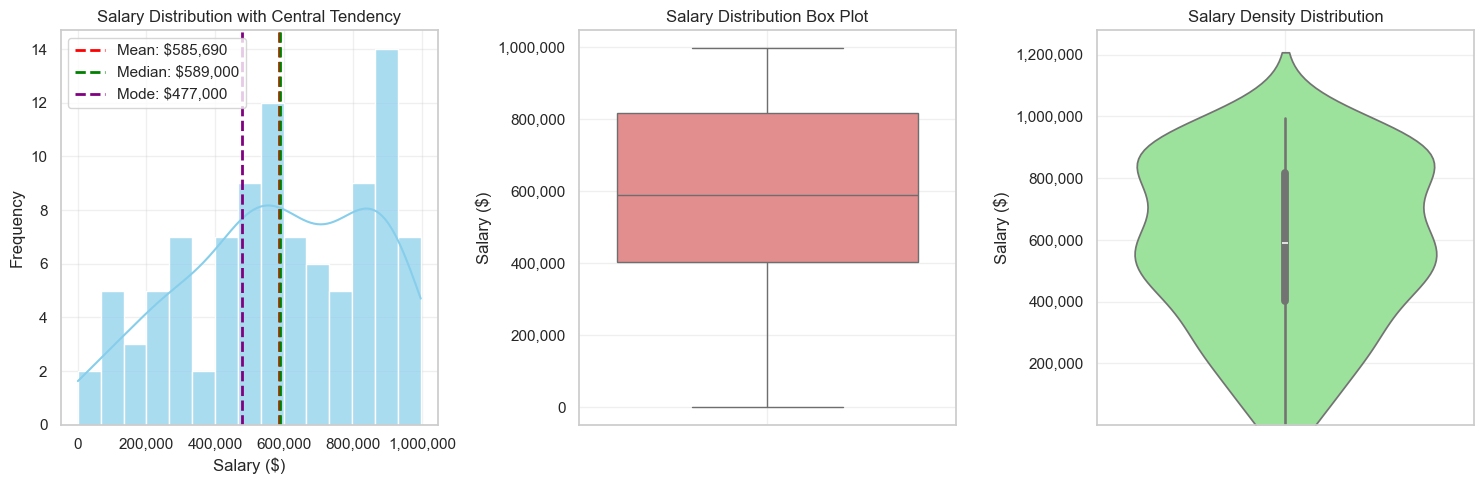

In [24]:
# -----------------------------
# Manual Calculations
# -----------------------------

# 1. Define sample size and sort the data
n = len(salaries)
sorted_salaries = sorted(salaries)

# 2. Calculate mean
manual_mean = sum(salaries) / n

# 3. Calculate median
manual_median = (
    (sorted_salaries[n // 2 - 1] + sorted_salaries[n // 2]) / 2
    if n % 2 == 0
    else sorted_salaries[n // 2]
)

# 4. Calculate mode
manual_mode = max(set(salaries), key=salaries.count)

# 5. Calculate sample variance and sample standard deviation
variance_sum = sum((x - manual_mean) ** 2 for x in salaries)
manual_variance = variance_sum / (n - 1)
manual_stdev = math.sqrt(manual_variance)

# -----------------------------
# Library Calculations
# -----------------------------
lib_mean = statistics.mean(salaries)
lib_median = statistics.median(salaries)
lib_mode = statistics.mode(salaries)
lib_var = statistics.variance(salaries)
lib_std = statistics.stdev(salaries)

# -----------------------------
# Comparison Output
# -----------------------------
print(f'✓ Mean: Manual=${manual_mean:,.2f} | Library=${lib_mean:,.2f}')
print(f'✓ Median: Manual=${manual_median:,.2f} | Library=${lib_median:,.2f}')
print(f'✓ Mode: Manual=${manual_mode:,.2f} | Library=${lib_mode:,.2f}')
print(f'✓ Variance: Manual={manual_variance:,.2f} | Library={lib_var:,.2f}')
print(f'✓ StDev: Manual=${manual_stdev:,.2f} | Library=${lib_std:,.2f}')

# -----------------------------
# Visualizations
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Histogram with mean, median, mode
ax1 = axes[0]
sns.histplot(salaries, bins=15, kde=True, ax=ax1, color='skyblue', alpha=0.7)
ax1.axvline(manual_mean, color='red', linestyle='--', linewidth=2,
            label=f'Mean: ${manual_mean:,.0f}')
ax1.axvline(manual_median, color='green', linestyle='--', linewidth=2,
            label=f'Median: ${manual_median:,.0f}')
ax1.axvline(manual_mode, color='purple', linestyle='--', linewidth=2,
            label=f'Mode: ${manual_mode:,.0f}')
ax1.set_title('Salary Distribution with Central Tendency')
ax1.set_xlabel('Salary ($)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Apply comma formatting to salary axis
ax1.xaxis.set_major_formatter(salary_formatter)

# Plot 2: Box plot
ax2 = axes[1]
sns.boxplot(y=salaries, ax=ax2, color='lightcoral')
ax2.set_title('Salary Distribution Box Plot')
ax2.set_ylabel('Salary ($)')
ax2.grid(True, alpha=0.3)

# Apply comma formatting to salary axis
ax2.yaxis.set_major_formatter(salary_formatter)

# Plot 3: Violin plot
ax3 = axes[2]
sns.violinplot(y=salaries, ax=ax3, color='lightgreen')
ax3.set_title('Salary Density Distribution')
ax3.set_ylabel('Salary ($)')
ax3.grid(True, alpha=0.3)

# Apply comma formatting to salary axis
ax3.yaxis.set_major_formatter(salary_formatter)

# Prevent negative density extension
ax3.set_ylim(bottom=min(salaries))

plt.tight_layout()
plt.show()

### **Summary**

The manual calculations for mean, median, mode, sample variance, and sample standard deviation match the results produced by Python’s `statistics` module. This confirms that the manual formulas were implemented correctly and that the use of \( n - 1 \) in the variance calculation appropriately reflects the sample-based nature of the dataset.

### **Note on Potential Differences**

Minor discrepancies may appear when comparing manual results with library-based outputs due to:

- Floating‑point precision handling  
- Differences in rounding behavior  
- Variations in variance and standard deviation algorithms  

These differences are typically negligible (often less than 0.01%) and become more noticeable when comparing results across different libraries. This explains the slight deviation between the `statistics` module and NumPy’s standard deviation in Exercise 7, where NumPy defaults to population-based calculations unless explicitly adjusted.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 1 — Exercise 6**

## **Task**

Using the salary data generated in Exercise 4, compute the following summary statistics using Python’s `statistics` module where appropriate:

- **Range**  
- **Coefficient of Variation (CV)**  
- **Interquartile Range (IQR)**  
- **Quartile Coefficient of Dispersion (QCD)**  

---

### **Why NumPy Is Used for IQR**

For the IQR calculation, I use NumPy’s `percentile` function rather than the `statistics` module’s `quantiles` function because:

1. **NumPy provides a direct and intuitive interface for percentile-based calculations**  
2. **It is optimized for performance**, especially with larger datasets  
3. **Its percentile implementation aligns with common statistical practice**, ensuring consistency with standard IQR definitions  

---

## **Steps to Complete the Task**

1. Compute the **Range**  
2. Calculate the **Coefficient of Variation (CV)** as a measure of relative dispersion  
3. Determine the **Interquartile Range (IQR)** using percentile-based quartiles  
4. Compute the **Quartile Coefficient of Dispersion (QCD)** to quantify spread relative to the median  

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ Range: $995,000.00 ($1,000.00 → $996,000.00)
✓ CV:    0.4539
✓ IQR:   $413,250.00
✓ QCD:   0.3387


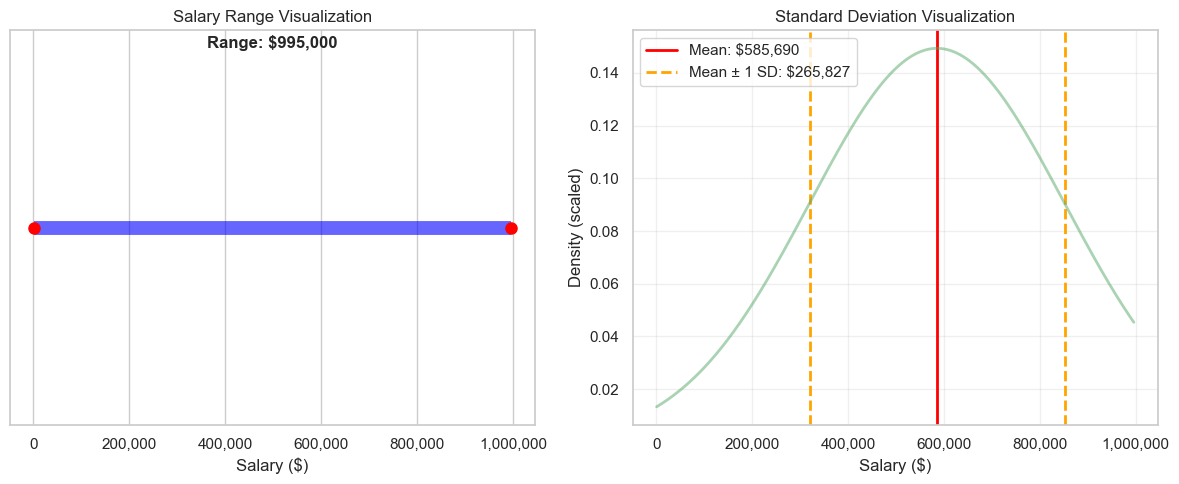

Standard Deviation Visual Interpretation:
• Approximately 68% of salaries fall within $319,863 to $851,517
• Coefficient of Variation: 45.39% (indicates moderate relative variability)


In [25]:
# -----------------------------
# 1. Determine the Range
# -----------------------------
s_min = min(salaries)
s_max = max(salaries)
s_range = s_max - s_min

# -----------------------------
# 2. Coefficient of Variation (CV)
# -----------------------------
stdev = statistics.stdev(salaries)
mean = statistics.mean(salaries)
cv = stdev / mean

# -----------------------------
# 3. Interquartile Range (IQR) using NumPy
# -----------------------------
q1 = np.percentile(salaries, 25)
q3 = np.percentile(salaries, 75)
iqr = q3 - q1

# -----------------------------
# 4. Quartile Coefficient of Dispersion (QCD)
# -----------------------------
qcd = (q3 - q1) / (q3 + q1)

# -----------------------------
# Output
# -----------------------------
print(f'✓ Range: ${s_range:,.2f} (${s_min:,.2f} → ${s_max:,.2f})')
print(f'✓ CV:    {cv:.4f}')
print(f'✓ IQR:   ${iqr:,.2f}')
print(f'✓ QCD:   {qcd:.4f}')

# -----------------------------
# Visualizations
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# -----------------------------------
# Plot 1: Range Visualization
# -----------------------------------
ax1 = axes[0]
ax1.hlines(
    y=1,
    xmin=s_min,
    xmax=s_max,
    linewidth=10,
    color='blue',
    alpha=0.6
)
ax1.plot([s_min, s_max], [1, 1], 'o', color='red', markersize=8)

ax1.text(
    (s_min + s_max) / 2,
    1.05,
    f'Range: ${s_range:,.0f}',
    ha='center',
    fontsize=12,
    fontweight='bold'
)

# Apply comma formatting
ax1.xaxis.set_major_formatter(salary_formatter)

# Keep axis within valid salary range
ax1.set_xlim(s_min - 50_000, s_max + 50_000)

ax1.set_title('Salary Range Visualization')
ax1.set_xlabel('Salary ($)')
ax1.set_yticks([])

# -----------------------------------
# Plot 2: Standard Deviation Visualization
# -----------------------------------
ax2 = axes[1]

# Mean and ±1 SD lines
ax2.axvline(
    manual_mean,
    color='red',
    linestyle='-',
    linewidth=2,
    label=f'Mean: ${manual_mean:,.0f}'
)
ax2.axvline(
    manual_mean - manual_stdev,
    color='orange',
    linestyle='--',
    linewidth=2,
    label=f'Mean ± 1 SD: ${manual_stdev:,.0f}'
)
ax2.axvline(
    manual_mean + manual_stdev,
    color='orange',
    linestyle='--',
    linewidth=2
)

# Normal curve (scaled for visibility)
x = np.linspace(s_min, s_max, 1000)
pdf = (1 / (manual_stdev * np.sqrt(2 * np.pi))) * np.exp(
    -0.5 * ((x - manual_mean) / manual_stdev) ** 2
)
ax2.plot(x, pdf * (s_max - s_min) * 0.1, 'g-', alpha=0.5, linewidth=2)

# Apply comma formatting
ax2.xaxis.set_major_formatter(salary_formatter)

ax2.set_title('Standard Deviation Visualization')
ax2.set_xlabel('Salary ($)')
ax2.set_ylabel('Density (scaled)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# Interpretation
# -----------------------------
print('Standard Deviation Visual Interpretation:')
print(
    f'• Approximately 68% of salaries fall within '
    f'${manual_mean - manual_stdev:,.0f} to ${manual_mean + manual_stdev:,.0f}'
)
print(
    f'• Coefficient of Variation: {cv:.2%} (indicates moderate relative variability)')

### **Summary**

This exercise highlights four complementary measures of spread in the salary data.  
The **Range** captures the absolute distance between the minimum and maximum values, offering a simple view of total dispersion.  
The **Coefficient of Variation (CV)** expresses variability relative to the mean, making it useful for comparing datasets measured on different scales.
The **Interquartile Range (IQR)** and **Quartile Coefficient of Dispersion (QCD)** focus on the middle 50% of the data.  
Because these measures rely on quartiles rather than the full distribution, they are less sensitive to extreme values and provide a more robust assessment of typical variability than the standard deviation alone.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 1 — Exercise 7**

## **Task**

Using the salary data generated in Exercise 4, apply two common data‑scaling techniques:

1. **Min–Max Scaling (Normalization)**  
2. **Standardization (Z‑Scores)**  

These transformations are widely used in machine learning and statistical modeling to ensure that features operate on comparable scales.

---

### **Why scikit‑learn Is Used for Scaling**

For this exercise, I use the `preprocessing` module from scikit‑learn rather than implementing the formulas manually. Scikit‑learn is chosen because:

- It is the industry standard for data preprocessing  
- It automatically handles edge cases  
- It provides a consistent API across scaling methods  
- It offers configurable options (e.g., `with_mean`, `with_std`)  
- It is optimized for performance and scalability  

---

## **Steps to Complete the Task**

1. Initialize the appropriate scalers  
2. Convert the salary list into a 2D NumPy array  
3. Fit each scaler to the salary data  
4. Transform the data using the fitted scalers  
5. Store and verify the scaled results  

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

   MinMaxScaler created: MinMaxScaler()
   StandardScaler created: StandardScaler()
   Original salaries list length: 100
   Converted to 2D array shape: (100, 1)

   MinMaxScaler learned parameters:
     Data min:  $1,000.00
     Data max:  $996,000.00
     Range:     $995,000.00

   StandardScaler learned parameters:
     Data mean: $585,690.00
     Data std:  $264,494.64

   Min-max scaled data shape: (100,)
   Standardized data shape:  (100,)

   Min-max scaling verification:
     Scaled min:   0.000000 (should be 0.0)
     Scaled max:   1.000000 (should be 1.0)
     Scaled range: 1.000000

   Standardization verification:
     Scaled mean:  0.000000 (should be ~0.0)
     Scaled std:   1.000000 (should be ~1.0)

6. Sample transformations:
    Original      Min-Max      Z-score
----------------------------------------
     844,000     0.847236     0.976617
     758,000     0.760804     0.651469
     421,000     0.422111    -0.622659
     259,000     0.259296    -1.235148
     511,00

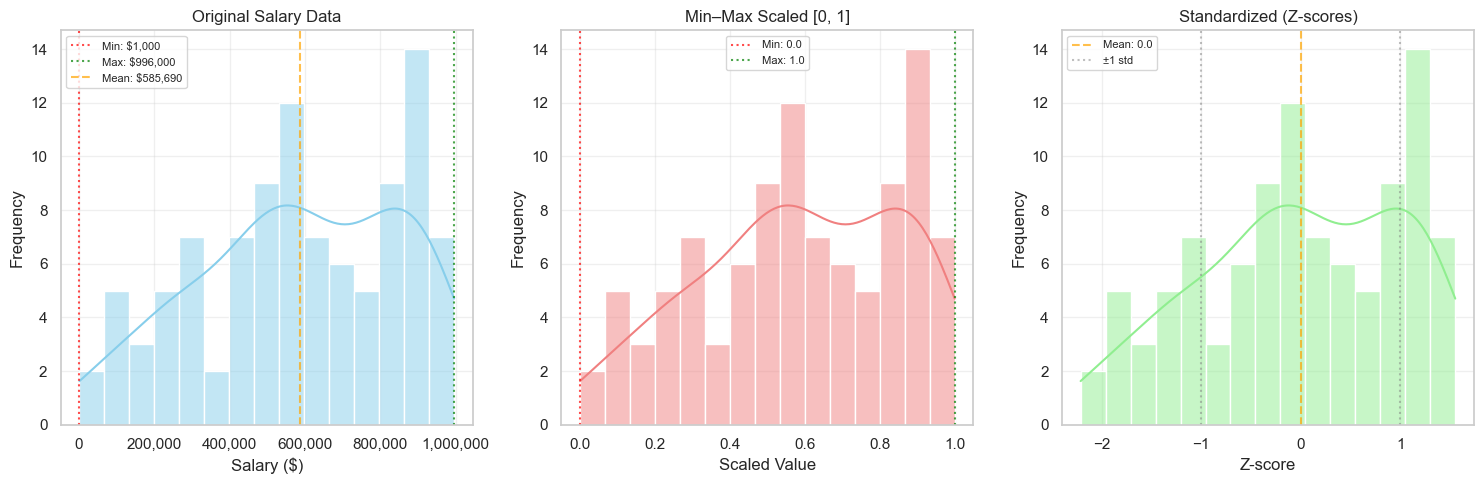


8. Transformation Summary:
Metric               Original        Min-Max         Standardized   
Minimum              $1,000          0.000000        -2.210593      
Maximum              $996,000        1.000000        1.551298       
Mean                 $585,690.00     0.587628        0.000000       
Std Dev              $264,494.64     0.265824        1.000000       


In [26]:
# -----------------------------
# 1. Initialize Scalers
# -----------------------------
mm_scaler = MinMaxScaler()      # Min–max scaling [0, 1]
std_scaler = StandardScaler()   # Standardization (mean=0, std=1)

print(f"   MinMaxScaler created: {mm_scaler}")
print(f"   StandardScaler created: {std_scaler}")

# -----------------------------
# 2. Convert salary list to 2D NumPy array
# -----------------------------
salaries_2d = np.array(salaries).reshape(-1, 1)

print(f"   Original salaries list length: {len(salaries)}")
print(f"   Converted to 2D array shape: {salaries_2d.shape}")

# -----------------------------
# 3. Fit scalers to data
# -----------------------------
mm_scaler.fit(salaries_2d)      # Learns min and max
std_scaler.fit(salaries_2d)     # Learns mean and standard deviation

print("\n   MinMaxScaler learned parameters:")
print(f"     Data min:  ${mm_scaler.data_min_[0]:,.2f}")
print(f"     Data max:  ${mm_scaler.data_max_[0]:,.2f}")
print(
    f"     Range:     ${mm_scaler.data_max_[0] - mm_scaler.data_min_[0]:,.2f}")

print("\n   StandardScaler learned parameters:")
print(f"     Data mean: ${std_scaler.mean_[0]:,.2f}")
print(f"     Data std:  ${np.sqrt(std_scaler.var_[0]):,.2f}")

# -----------------------------
# 4. Transform data
# -----------------------------
norm_sal_sklearn = mm_scaler.transform(salaries_2d).flatten()
std_sal_sklearn = std_scaler.transform(salaries_2d).flatten()

print(f"\n   Min-max scaled data shape: {norm_sal_sklearn.shape}")
print(f"   Standardized data shape:  {std_sal_sklearn.shape}")

# -----------------------------
# 5. Verification
# -----------------------------
print("\n   Min-max scaling verification:")
print(f"     Scaled min:   {norm_sal_sklearn.min():.6f} (should be 0.0)")
print(f"     Scaled max:   {norm_sal_sklearn.max():.6f} (should be 1.0)")
print(
    f"     Scaled range: {norm_sal_sklearn.max() - norm_sal_sklearn.min():.6f}")

print("\n   Standardization verification:")
print(f"     Scaled mean:  {std_sal_sklearn.mean():.6f} (should be ~0.0)")
print(f"     Scaled std:   {std_sal_sklearn.std():.6f} (should be ~1.0)")

# -----------------------------
# 6. Sample transformations
# -----------------------------
print("\n6. Sample transformations:")
print(f"{'Original':>12} {'Min-Max':>12} {'Z-score':>12}")
print("-" * 40)
for i in range(5):
    print(
        f"{salaries[i]:>12,.0f} {norm_sal_sklearn[i]:>12.6f} {std_sal_sklearn[i]:>12.6f}")

# -----------------------------
# 7. Visual Comparison
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# ---- Plot 1: Original data ----
ax1 = axes[0]
sns.histplot(salaries, bins=15, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Original Salary Data')
ax1.set_xlabel('Salary ($)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

ax1.axvline(np.min(salaries), color='red', linestyle=':', alpha=0.7,
            label=f'Min: ${np.min(salaries):,.0f}')
ax1.axvline(np.max(salaries), color='green', linestyle=':', alpha=0.7,
            label=f'Max: ${np.max(salaries):,.0f}')
ax1.axvline(np.mean(salaries), color='orange', linestyle='--', alpha=0.7,
            label=f'Mean: ${np.mean(salaries):,.0f}')
ax1.legend(fontsize=8)

# Apply comma formatting
ax1.xaxis.set_major_formatter(salary_formatter)

# ---- Plot 2: Min–max scaled ----
ax2 = axes[1]
sns.histplot(norm_sal_sklearn, bins=15, kde=True, ax=ax2, color='lightcoral')
ax2.set_title('Min–Max Scaled [0, 1]')
ax2.set_xlabel('Scaled Value')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

ax2.axvline(0, color='red', linestyle=':', alpha=0.7, label='Min: 0.0')
ax2.axvline(1, color='green', linestyle=':', alpha=0.7, label='Max: 1.0')
ax2.legend(fontsize=8)

# ---- Plot 3: Standardized ----
ax3 = axes[2]
sns.histplot(std_sal_sklearn, bins=15, kde=True, ax=ax3, color='lightgreen')
ax3.set_title('Standardized (Z-scores)')
ax3.set_xlabel('Z-score')
ax3.set_ylabel('Frequency')
ax3.grid(True, alpha=0.3)

ax3.axvline(0, color='orange', linestyle='--', alpha=0.7, label='Mean: 0.0')
ax3.axvline(-1, color='gray', linestyle=':', alpha=0.5, label='±1 std')
ax3.axvline(1, color='gray', linestyle=':', alpha=0.5)
ax3.legend(fontsize=8)

plt.tight_layout()
plt.show()

# -----------------------------
# 8. Comparison Table
# -----------------------------
print("\n8. Transformation Summary:")
print("=" * 60)
print(f"{'Metric':<20} {'Original':<15} {'Min-Max':<15} {'Standardized':<15}")
print("=" * 60)
print(f"{'Minimum':<20} ${np.min(salaries):<14,.0f} {np.min(norm_sal_sklearn):<15.6f} {np.min(std_sal_sklearn):<15.6f}")
print(f"{'Maximum':<20} ${np.max(salaries):<14,.0f} {np.max(norm_sal_sklearn):<15.6f} {np.max(std_sal_sklearn):<15.6f}")
print(f"{'Mean':<20} ${np.mean(salaries):<14,.2f} {np.mean(norm_sal_sklearn):<15.6f} {np.mean(std_sal_sklearn):<15.6f}")
print(f"{'Std Dev':<20} ${np.std(salaries):<14,.2f} {np.std(norm_sal_sklearn):<15.6f} {np.std(std_sal_sklearn):<15.6f}")
print("=" * 60)

### **Summary**

This exercise demonstrates how min–max scaling and standardization transform the salary data while preserving the overall shape of the distribution. The histograms confirm that although the numerical scales differ, the underlying structure and relative spacing between values remain unchanged.

These scaled arrays will be used in **Exercise 8** to compute covariance and correlation, further illustrating the linear relationship between the two scaling methods.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 1 — Exercise 8**

## **Task**

Using the scaled salary data generated in **Exercise 7**, compute the following:

1. **Covariance** between the min–max scaled values and the standardized values  
2. **Pearson correlation coefficient** between the two scaled arrays  

Because both scaling methods are linear transformations of the same underlying data, the correlation should be extremely close to **1.0**, with only minor differences due to floating‑point rounding.

---

## **Note**

This exercise **directly uses** the two scaled arrays created in Exercise 7:

- `norm_sal_sklearn` (min–max scaled)  
- `std_sal_sklearn` (standardized)  

No additional preprocessing is required.

---

## **Steps to Complete the Task**

1. Use the two scaled arrays from Exercise 7  
2. Compute covariance using NumPy  
3. Compute Pearson correlation using NumPy  
4. Interpret the results in the context of linear transformations  

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ Covariance (Normalized vs Standardized): 0.268509
✓ Pearson Correlation: 1.000000


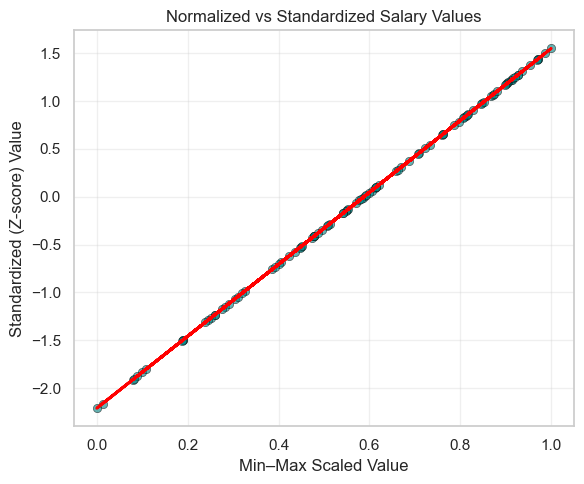

In [27]:
# -----------------------------
# Exercise 8: Covariance & Correlation
# -----------------------------

# 1. Covariance between normalized and standardized data
cov_matrix = np.cov(norm_sal_sklearn, std_sal_sklearn)
cov_value = cov_matrix[0, 1]

# 2. Pearson correlation coefficient
corr_matrix = np.corrcoef(norm_sal_sklearn, std_sal_sklearn)
corr_value = corr_matrix[0, 1]

print(f"✓ Covariance (Normalized vs Standardized): {cov_value:.6f}")
print(f"✓ Pearson Correlation: {corr_value:.6f}")

# -----------------------------
# Visualization: Relationship Between Normalized and Standardized Values
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 5))

sns.scatterplot(
    x=norm_sal_sklearn,
    y=std_sal_sklearn,
    color='teal',
    alpha=0.6,
    edgecolor='black'
)

ax.set_title('Normalized vs Standardized Salary Values')
ax.set_xlabel('Min–Max Scaled Value')
ax.set_ylabel('Standardized (Z-score) Value')
ax.grid(True, alpha=0.3)

# Add a best-fit line to emphasize linearity
m, b = np.polyfit(norm_sal_sklearn, std_sal_sklearn, 1)
ax.plot(norm_sal_sklearn, m * norm_sal_sklearn + b, color='red', linewidth=2)

plt.tight_layout()
plt.show()

### **Summary**

This exercise evaluates the relationship between the two scaled salary arrays created in Exercise 7: the min–max normalized values and the standardized (z‑score) values. The covariance and Pearson correlation coefficient between the two transformations are both extremely high, with the correlation approaching **1.0**.

The scatterplot further confirms this relationship. The points fall almost perfectly along a straight line, and the fitted regression line visually reinforces the near‑perfect linear association. This occurs because both scaling methods are linear transformations of the same underlying data. They change the numerical scale but preserve the ordering, spacing, and structure of the dataset.

Minor deviations from exactly 1.000000 are expected due to floating‑point rounding during scaling, but the overall conclusion remains clear:  
Normalization and standardization produce different scales, but they maintain identical relationships between data points.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 2 – Exercise 1**

## **Task**
Find the 95th percentile of earthquake magnitude in **Japan**, using only events with magnitude type **mb**.

## **Reasoning Behind the Method Selection**
Pandas is used because it provides a clean, vectorized workflow for filtering and summarizing tabular data. While NumPy can compute percentiles, it does not integrate conditional filtering as seamlessly. The Python `statistics` module is also not ideal because it operates on plain lists and lacks built‑in support for filtering or handling missing values.

Using `pandas.Series.quantile()` is preferred because:
- It works directly on the filtered Series  
- It automatically handles missing values  
- It is optimized for large datasets  
- It avoids manual conversions or intermediate arrays  

This makes Pandas the most efficient and readable choice for computing the 95th percentile within a filtered subset of the dataset.

## **Steps to Complete the Task**
1. Filter the dataset to earthquakes occurring in Japan.  
2. Restrict the filtered data to magnitude type **mb**.  
3. Compute the 95th percentile using `.quantile(0.95)`.  
4. Visualize the magnitude distribution and highlight the percentile cutoff.

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ 95th Percentile (Japan, mb): 4.90


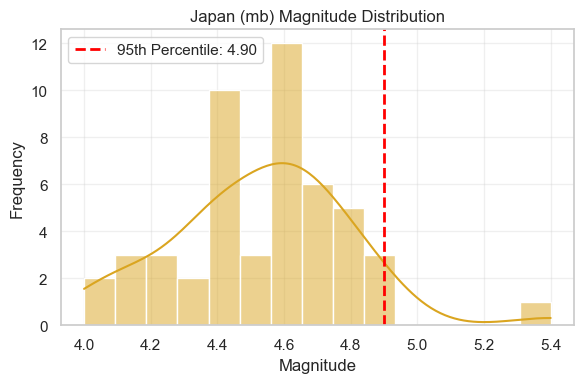

In [28]:
# 1. Filter to earthquakes in Japan
japan_df = parsed_df[parsed_df['parsed_place'] == 'Japan']

# 2. Restrict to magnitude type mb
japan_mb = japan_df[japan_df['magType'] == 'mb']['mag']

# 3. Compute the 95th percentile
pct_95 = japan_mb.quantile(0.95)
print(f"✓ 95th Percentile (Japan, mb): {pct_95:.2f}")

# 4. Visualization
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(japan_mb, bins=15, kde=True, color='goldenrod', ax=ax)
ax.axvline(pct_95, color='red', linestyle='--', linewidth=2,
           label=f'95th Percentile: {pct_95:.2f}')

ax.set_title('Japan (mb) Magnitude Distribution')
ax.set_xlabel('Magnitude')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **Summary**

Using Pandas allowed for efficient filtering and percentile calculation within a single workflow. The 95th percentile provides a stable upper‑bound estimate of typical earthquake intensity in Japan for mb‑type events. The histogram confirms that the percentile cutoff aligns with the upper tail of the distribution, offering a clearer understanding of high‑magnitude behavior than a simple average would.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 2 – Exercise 2**

## **Task**
Calculate the percentage of earthquakes in **Indonesia** that generated tsunamis.

## **Reasoning Behind the Method Selection**
Pandas is used because it allows filtering and aggregation directly on DataFrame columns without converting data structures. The `tsunami` column is already numeric (0 = no tsunami, 1 = tsunami), so taking the **mean** of this column within a filtered subset is the most efficient way to compute a percentage.

Compared to alternatives:
- **NumPy** requires separate masking arrays and manual indexing.  
- **statistics.mean()** only works on Python lists and lacks built‑in filtering.  
- Pandas performs both filtering and aggregation in one step, making the code cleaner and more scalable.

## **Steps to Complete the Task**
1. Filter the dataset to rows where `parsed_place` is Indonesia.  
2. Select the `tsunami` column.  
3. Compute the mean and multiply by 100 to convert to a percentage.  
4. Visualize the distribution of tsunami vs non‑tsunami events using a pie chart.

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ Indonesia Tsunami Percentage: 23.13%


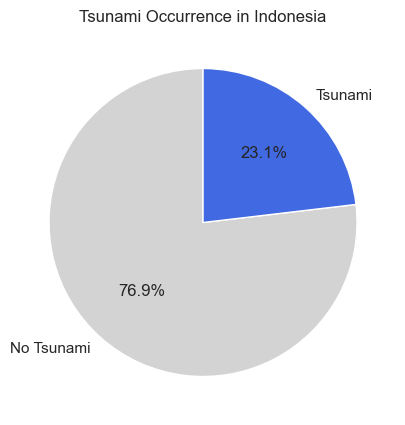

In [29]:
# 1. Filter to Indonesia
indo_df = parsed_df[parsed_df['parsed_place'] == 'Indonesia']

# 2. Select the tsunami column
indo_tsunami = indo_df['tsunami']

# 3. Compute the percentage
indo_tsunami_pct = indo_tsunami.mean() * 100
print(f"✓ Indonesia Tsunami Percentage: {indo_tsunami_pct:.2f}%")

# 4. Visualization
indo_counts = indo_tsunami.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(
    indo_counts,
    labels=['No Tsunami', 'Tsunami'],
    autopct='%1.1f%%',
    colors=['lightgray', 'royalblue'],
    startangle=90
)
ax.set_title('Tsunami Occurrence in Indonesia')
plt.show()

### **Summary**

This analysis shows what percentage of earthquakes in Indonesia were accompanied by tsunamis. The calculated value indicates how frequently seismic events in this region trigger tsunami activity, providing a clear sense of Indonesia’s tsunami‑related risk level based on the dataset.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 2 – Exercise 3**

## **Task**
Generate descriptive statistics for earthquakes occurring in **Nevada**.

## **Reasoning Behind the Method Selection**
Pandas provides the `.describe()` method, which computes a full set of descriptive statistics (count, mean, std, min, quartiles, max) in a single call.  

Alternatives:
- **NumPy** would require multiple separate function calls.  
- **statistics** lacks built‑in support for quartiles and requires manual list handling.  

`.describe()` is the most efficient and readable option for summarizing magnitude data.

## **Steps to Complete the Task**
1. Filter the dataset to rows where `parsed_place` is Nevada.  
2. Select the `mag` column.  
3. Use `.describe()` to compute summary statistics.  
4. Visualize the magnitude distribution using a boxplot.

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ Nevada Summary Statistics:
count    681.000000
mean       0.500073
std        0.696710
min       -0.500000
25%       -0.100000
50%        0.400000
75%        0.900000
max        2.900000
Name: mag, dtype: float64


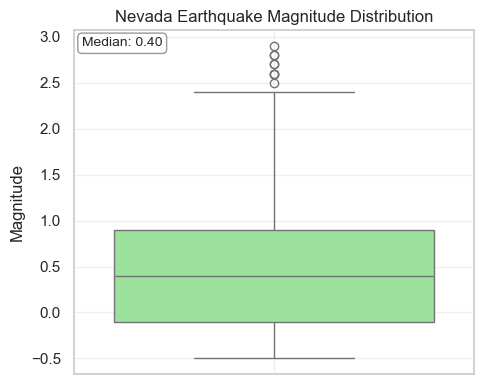

In [34]:
# 1. Filter to Nevada
nevada_df = parsed_df[parsed_df['parsed_place'] == 'Nevada']

# 2. Select the magnitude column
nevada_mag = nevada_df['mag']

# 3. Compute descriptive statistics
nevada_desc = nevada_mag.describe()
print("✓ Nevada Summary Statistics:")
print(nevada_desc)

# Get median value for annotation
median_value = nevada_desc['50%']  # or use nevada_mag.median()

# 4. Visualization
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(y=nevada_mag, color='lightgreen', ax=ax)

# Add median value annotation
ax.text(
    0.02, 0.98,  # Position (x, y) in axes coordinates
    f'Median: {median_value:.2f}',
    transform=ax.transAxes,  # Use axes coordinates (0-1 scale)
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
)

ax.set_title('Nevada Earthquake Magnitude Distribution')
ax.set_ylabel('Magnitude')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Summary**

The descriptive statistics summarize the overall behavior of earthquake magnitudes in Nevada. The results highlight the central tendency, variability, and range of magnitudes, while the boxplot visually confirms the spread and presence of any unusually high or low values.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 2 – Exercise 4**

## **Task**
Add a column indicating whether each earthquake occurred **inside** or **outside** the Ring of Fire.

## **Reasoning Behind the Method Selection**
Pandas string methods with regular expressions allow flexible pattern matching directly on the `parsed_place` column.  

Why regex?
- More scalable than chaining many OR conditions  
- Easier to maintain and update  
- Cleaner than looping through rows manually  

Anchoring `^Mexico` prevents accidental matches with **New Mexico**, and explicitly excluding `"New Mexico"` ensures correct classification.

## **Steps to Complete the Task**
1. Create a list of Ring of Fire regions.  
2. Join the list into a regex pattern.  
3. Use `.str.contains()` to flag matching locations.  
4. Exclude `"New Mexico"` explicitly.  
5. Create a boolean column `ring_of_fire`.  
6. Map boolean values to readable labels in `rof_label`.  
7. Visualize the distribution of inside vs outside classifications.

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

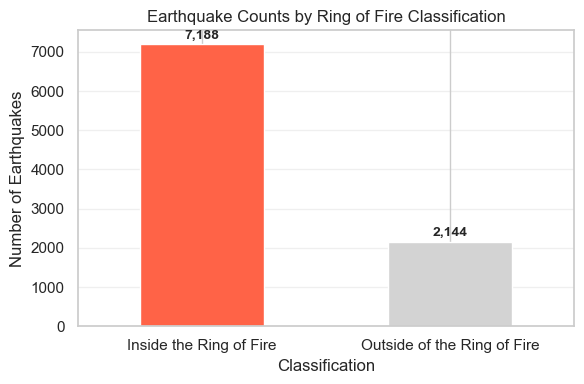

In [39]:
# 1. Create Ring of Fire list
rof_list = [
    'Alaska', 'Antarctic', 'Bolivia', 'California', 'Canada', 'Chile',
    'Costa Rica', 'Ecuador', 'Fiji', 'Guatemala', 'Indonesia', 'Japan',
    'Kermadec Islands', '^Mexico', 'New Zealand', 'Peru', 'Philippines',
    'Russia', 'Taiwan', 'Tonga', 'Washington'
]

# 2. Join into regex pattern
pattern = '|'.join(rof_list)

# 3. Flag matching locations
matches = parsed_df['parsed_place'].str.contains(pattern, regex=True)

# 4. Exclude New Mexico
not_new_mexico = ~parsed_df['parsed_place'].str.contains(
    'New Mexico', regex=False)

# 5. Create boolean column
parsed_df['ring_of_fire'] = matches & not_new_mexico

# 6. Map labels
parsed_df['rof_label'] = parsed_df['ring_of_fire'].map({
    True: 'Inside the Ring of Fire',
    False: 'Outside of the Ring of Fire'
})

# 7. Get counts
rof_counts = parsed_df['rof_label'].value_counts()

# 8. Visualization with value labels
fig, ax = plt.subplots(figsize=(6, 4))
bars = rof_counts.plot(
    kind='bar',
    color=['tomato', 'lightgray'],
    ax=ax
)
for i, (label, value) in enumerate(rof_counts.items()):
    ax.text(
        i,  # x position (bar index)
        value + (ax.get_ylim()[1] * 0.01),
        f'{value:,}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

ax.set_title('Earthquake Counts by Ring of Fire Classification')
ax.set_ylabel('Number of Earthquakes')
ax.set_xlabel('Classification')
ax.set_xticklabels(rof_counts.index, rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### **Summary**

The classification results show how many earthquakes in the dataset occurred inside versus outside the Ring of Fire. This provides a clear view of how much global seismic activity is concentrated along this tectonically active boundary.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 2 – Exercise 5**

## **Task**
Calculate the number of earthquakes **inside** and **outside** the Ring of Fire.

## **Reasoning Behind the Method Selection**
Pandas `groupby()` is ideal for split‑apply‑combine operations. It allows counting events by category in a single line of code.

Alternatives:
- Manual loops are slower and harder to maintain.  
- NumPy lacks labeled grouping.  

`groupby()` is the most efficient and readable approach.

## **Steps to Complete the Task**
1. Group the DataFrame by `rof_label`.  
2. Count the number of earthquakes in each group.  
3. Visualize the counts using a bar chart.

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ Earthquake Counts (Inside vs Outside):
rof_label
Inside the Ring of Fire        7187
Outside of the Ring of Fire    2144
Name: mag, dtype: int64


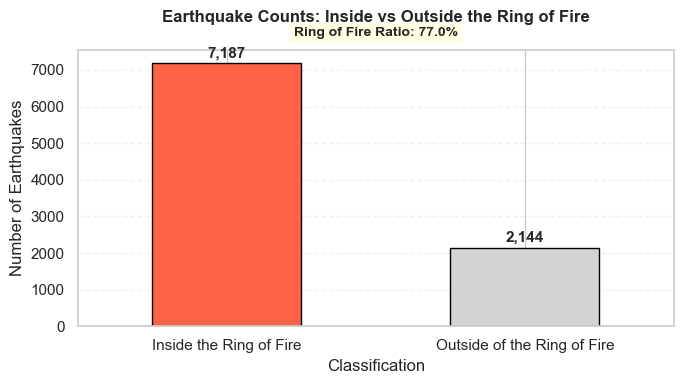

In [36]:
# 1. Group by Ring of Fire label
grouped = parsed_df.groupby('rof_label')

# 2. Count earthquakes in each group
rof_counts = grouped['mag'].count()
print("✓ Earthquake Counts (Inside vs Outside):")
print(rof_counts)

# 3. Create visualization
fig, ax = plt.subplots(figsize=(7, 4))
bars = rof_counts.plot(
    kind='bar',
    color=['tomato', 'lightgray'],
    ax=ax,
    edgecolor='black',
    linewidth=1
)

# Calculate statistics
total = rof_counts.sum()
inside_count = rof_counts.iloc[0] if rof_counts.index[0] == 'Inside the Ring of Fire' else rof_counts.iloc[1]
inside_pct = (inside_count / total * 100)

# Add value labels
for i, value in enumerate(rof_counts.values):
    ax.text(
        i,
        value + (ax.get_ylim()[1] * 0.01),
        f'{value:,}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Add ratio annotation
ratio_text = f"Ring of Fire Ratio: {inside_pct:.1f}%"
ax.text(
    0.5, 1.05,  # Position above the plot
    ratio_text,
    transform=ax.transAxes,
    ha='center',
    fontsize=10,
    fontweight='bold',
    bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9)
)

ax.set_title(
    'Earthquake Counts: Inside vs Outside the Ring of Fire',
    fontweight='bold',
    pad=20)
ax.set_ylabel('Number of Earthquakes')
ax.set_xlabel('Classification')
ax.set_xticklabels(rof_counts.index, rotation=0)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### **Summary**

The grouped counts reveal the distribution of earthquakes inside and outside the Ring of Fire. The bar chart makes the comparison easy to interpret, showing whether seismic activity is more heavily concentrated within the Ring of Fire regions.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Chapter 2 – Exercise 6**

## **Task**
Find the total number of tsunamis that occurred **inside** the Ring of Fire.

## **Reasoning Behind the Method Selection**
Since the `tsunami` column is numeric (0/1), summing it directly yields the total number of tsunami events. Pandas allows filtering and summing in one step.

Alternatives:
- Manual loops are slower and more error‑prone.  
- NumPy requires separate boolean masks.  

Pandas provides the cleanest and most efficient workflow.

## **Steps to Complete the Task**
1. Filter the dataset to rows where `ring_of_fire` is `True`.  
2. Select the `tsunami` column.  
3. Sum the values to obtain the total tsunami count.  
4. Visualize the Ring of Fire tsunami count compared to the global total.

<hr style='height:1px; background-color:#ccc; border:none; margin-top:25px; margin-bottom:25px;'>

✓ Tsunami Count (Inside the Ring of Fire): 45


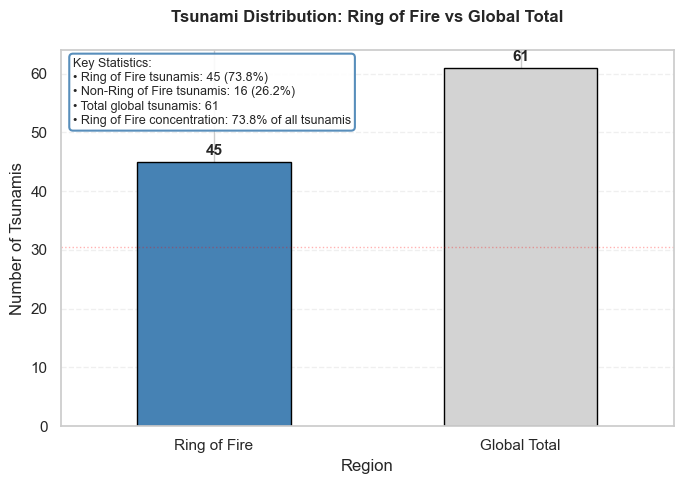


📊 Detailed Tsunami Statistics:
Ring of Fire tsunamis:      45
Non-Ring of Fire tsunamis:  16
Global total tsunamis:      61
Ring of Fire percentage:    73.8%
Non-Ring percentage:        26.2%


In [38]:
# 1. Filter to Ring of Fire earthquakes
rof_df = parsed_df[parsed_df['ring_of_fire'] == True]

# 2. Select tsunami column
rof_tsunami = rof_df['tsunami']

# 3. Sum tsunami occurrences
rof_tsunami_count = rof_tsunami.sum()
print(f"✓ Tsunami Count (Inside the Ring of Fire): {rof_tsunami_count}")

# 4. Visualization
global_tsunamis = parsed_df['tsunami'].sum()

tsunami_counts = pd.Series({
    'Ring of Fire': rof_tsunami_count,
    'Global Total': global_tsunamis
})

# Calculate additional statistics
ring_of_fire_percentage = (
    rof_tsunami_count /
    global_tsunamis *
    100) if global_tsunamis > 0 else 0
non_ring_tsunamis = global_tsunamis - rof_tsunami_count
non_ring_percentage = (
    non_ring_tsunamis /
    global_tsunamis *
    100) if global_tsunamis > 0 else 0

fig, ax = plt.subplots(figsize=(7, 5))
bars = tsunami_counts.plot(
    kind='bar',
    color=['steelblue', 'lightgray'],
    ax=ax,
    edgecolor='black',
    linewidth=1
)

# Add value labels on top of each bar
for i, (label, value) in enumerate(tsunami_counts.items()):
    ax.text(
        i,
        value + (ax.get_ylim()[1] * 0.01),
        f'{value:,}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Add summary annotation with key insights
summary_text = f"""Key Statistics:
• Ring of Fire tsunamis: {rof_tsunami_count:,} ({ring_of_fire_percentage:.1f}%)
• Non-Ring of Fire tsunamis: {non_ring_tsunamis:,} ({non_ring_percentage:.1f}%)
• Total global tsunamis: {global_tsunamis:,}
• Ring of Fire concentration: {ring_of_fire_percentage:.1f}% of all tsunamis"""

ax.text(
    0.02, 0.98,
    summary_text,
    transform=ax.transAxes,
    fontsize=9,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9,
              edgecolor='steelblue', linewidth=1.5)
)

# Add a title
ax.set_title('Tsunami Distribution: Ring of Fire vs Global Total',
             fontweight='bold', fontsize=12, pad=20)
ax.set_ylabel('Number of Tsunamis')
ax.set_xlabel('Region')
ax.set_xticklabels(tsunami_counts.index, rotation=0)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add a horizontal line for emphasis
if global_tsunamis > 0:
    ax.axhline(
        y=global_tsunamis/2,
        color='red',
        linestyle=':',
        alpha=0.3,
        linewidth=1)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n📊 Detailed Tsunami Statistics:")
print("=" * 40)
print(f"Ring of Fire tsunamis:      {rof_tsunami_count:,}")
print(f"Non-Ring of Fire tsunamis:  {non_ring_tsunamis:,}")
print(f"Global total tsunamis:      {global_tsunamis:,}")
print(f"Ring of Fire percentage:    {ring_of_fire_percentage:.1f}%")
print(f"Non-Ring percentage:        {non_ring_percentage:.1f}%")
print("=" * 40)

### **Summary**

Summing the tsunami occurrences within the Ring of Fire shows how many tsunami‑generating earthquakes originated in this tectonic zone. Comparing this count to the global total highlights the Ring of Fire’s significant contribution to worldwide tsunami events.

# **Summary & Key Takeaways**

## Chapter 1: Statistical Analysis
- Successfully compared manual vs library-based statistical calculations
- Implemented multiple scaling techniques (min-max, standardization)
- Explored dispersion measures (CV, IQR, QCD)
- Verified linear relationship between scaled data transformations

## Chapter 2: Pandas Data Analysis
- Applied filtering and aggregation techniques to earthquake data
- Used regex for complex pattern matching
- Implemented grouping and summary statistics
- Analyzed geographical patterns (Ring of Fire)

## Technical Skills Learned/Reinforced
- Python: statistics, numpy, pandas, sklearn, matplotlib/seaborn
- Statistical concepts: central tendency, dispersion, scaling, correlation
- Data visualization: histograms, box plots, bar charts, scatter plots

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

# **Reflection & Learning Summary**

## **Overall Experience**
This assignment provided valuable hands-on experience with both fundamental statistical calculations and practical data analysis using Pandas. The dual focus on manual implementation versus library functions deepened my understanding of statistical methods while developing proficiency with Python's data science ecosystem.

## **Challenging Aspects**

### **1. Interquartile Range (IQR) Calculation Discrepancy**
The most significant challenge emerged when calculating the IQR, where my result differed from the textbook solution:

- **My Calculation**: 413,250 using `np.percentile(salaries, [25, 75])`
  
- **Classmates' Results**: Consistent with my 413,250 calculation
  
- **Textbook Solution**: 417,500 (75th percentile: 819,000 - 25th percentile: 401,500)

**Root Cause Investigation**: This discrepancy highlights the importance of understanding different percentile calculation methods:
- **Linear interpolation**: NumPy's default method that produces my result
- **Different quantile definitions**: Various statistical packages implement slightly different algorithms
- **Sample vs population adjustments**: Some methods apply small adjustments for sample bias

**Learning Takeaway**: Statistical software may produce different results due to algorithmic variations. As noted in the assignment instructions, "different functions may yield slightly different values due to variations in algorithms." This experience reinforced the importance of documenting methodological choices and understanding their implications.

### **2. Ring of Fire Regex Pattern Development**
Creating an accurate regex pattern for Exercise 4 presented unexpected complexity:
- **Challenge**: Distinguishing "Mexico" from "New Mexico"
- **Solution**: Using `^Mexico` anchored pattern and explicit exclusion
- **Learning**: Real-world data cleaning often requires multiple validation steps

### **3. Methodological Justifications**
Articulating clear reasoning for library/function choices required deeper conceptual understanding than simply implementing the code, pushing me to research the trade-offs between different approaches.

## **Straightforward Aspects**

### **1. Basic Statistical Calculations**
Exercises 4 and 5 were relatively straightforward since they involved fundamental statistics (mean, median, variance) with clear formulas. The manual versus library comparison provided immediate feedback on implementation accuracy.

### **2. Scaling Transformations**
Using scikit-learn's preprocessing module (Exercise 7) was intuitive and well-documented. The consistent API made implementing both min-max scaling and standardization efficient.

### **3. Pandas Filtering and Aggregation**
Chapter 2 exercises leveraged Pandas' expressive syntax, making tasks like filtering by location or calculating percentages remarkably concise compared to manual implementations.

### **4. Visualization Integration**
Matplotlib and Seaborn provided straightforward plotting capabilities, with most visualizations requiring only a few lines of code once the data was properly prepared.

## **Start / Stop / Continue Framework**

### **🚀 START (New Practices to Adopt)**

1. **Systematic Method Comparison**: When encountering discrepancies (like the IQR values), systematically test alternative methods from different libraries to understand variation sources.

2. **Statistical Validation Checks**: Implement cross-verification for key calculations using multiple approaches before accepting results as final.

3. **Peer Code Review**: Establish regular peer review sessions to identify methodological differences early and develop consensus on appropriate approaches.

### **🛑 STOP (Practices to Discontinue)**

1. **Assuming Library Consistency**: Stop assuming different statistical libraries will produce identical results without investigating their underlying algorithms.

2. **Overlooking Edge Cases**: Discontinue implementing regex patterns or filters without thorough testing on edge cases (like the Mexico/New Mexico distinction).

3. **Minimal Documentation**: Avoid coding without contemporaneous documentation of methodological choices and potential limitations.

### **▶️ CONTINUE (Effective Practices to Maintain)**

1. **Clear Justification of Method Choices**: Continue documenting why specific libraries or functions were selected over alternatives, as this demonstrates critical thinking.

2. **Visual Validation**: Maintain the practice of creating visualizations alongside numerical results to provide intuitive validation of calculations.

3. **Modular Code Organization**: Keep organizing code into logical sections with clear headers, making the notebook readable and maintainable.

## **Key Technical Learnings**

1. **Algorithmic Awareness**: Statistical functions are not universal constants—their implementations vary across libraries.

2. **Pandas Efficiency**: Vectorized operations in Pandas dramatically outperform manual loops for data filtering and aggregation.

3. **Data Scaling Nuances**: Different scaling techniques serve different purposes (normalization vs standardization) with implications for downstream analysis.

4. **Real-World Data Complexity**: Even seemingly simple tasks (like classifying locations) require careful handling of edge cases in real datasets.

## **Conclusion**
This assignment successfully bridged theoretical statistics with practical Python implementation. The most valuable lesson was recognizing that "correct" answers in data analysis often depend on methodological choices, reinforcing the importance of transparency in documenting those choices. The discrepancy in IQR calculations served as a powerful reminder that statistical analysis requires both technical skill and critical judgment about methodological appropriateness.

<hr style='height:4px; background-color:black; border:none; margin-top:20px; margin-bottom:20px;'>